### 데이터 확인

In [1]:
import pandas as pd

df = pd.read_csv('c:/3rd_project/data/Train/movie_data_231009_total.csv')
df

,idx,영화명,embedding1,embedding2,embedding3,vehicle,food,animal,bird,person,...,color_5_r,color_5_g,color_5_b,act_freq,ani_freq,com_freq,dra_freq,hor_freq,etc_freq,genre
0,4658,잃어버린 마법의 섬 홋타라케,애니메이션,애니메이션,애니메이션,0,0,0,0,1,...,0.6157,0.7529,0.8039,7,5,0,0,0,0,애니메이션
1,4660,극장판 메탈 베이블레이드 VS 태양 작열의 침략자 솔블레이즈,애니메이션,애니메이션,애니메이션,0,0,1,0,0,...,0.6784,0.2275,0.1725,0,4,0,0,0,0,애니메이션
2,4661,동자 대소동,드라마,액션,액션,0,0,0,0,4,...,0.7725,0.6627,0.5137,15,0,14,0,0,0,코미디
3,4662,심장이 뛴다,드라마,-,드라마,0,0,0,0,0,...,0.6471,0.4902,0.3373,1,0,0,1,0,0,드라마
4,4663,내 친구의 소원,-,드라마,공포(호러),0,0,0,0,3,...,0.8863,0.7333,0.6118,1,0,1,0,0,0,코미디
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7000,18416,붉은 사막,공포(호러),드라마,공포(호러),0,0,0,0,1,...,0.3804,0.1529,0.1255,4,1,1,2,0,0,드라마
7001,18417,비닐하우스,공포(호러),드라마,드라마,0,0,0,0,1,...,0.4392,0.3412,0.4431,3,0,1,0,0,3,-
7002,18418,에고이스트,드라마,드라마,코미디,0,0,0,0,2,...,0.3843,0.2941,0.2000,0,0,0,0,0,0,드라마
7003,18419,핑크퐁 시네마 콘서트3 : 진저브레드맨을 잡아라,애니메이션,애니메이션,애니메이션,0,1,1,0,0,...,0.8549,0.7176,0.2902,20,37,0,0,0,0,애니메이션


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7005 entries, 0 to 7004
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   idx                  7005 non-null   int64  
 1   영화명                  7005 non-null   object 
 2   embedding1           7005 non-null   object 
 3   embedding2           7005 non-null   object 
 4   embedding3           7005 non-null   object 
 5   vehicle              7005 non-null   int64  
 6   food                 7005 non-null   int64  
 7   animal               7005 non-null   int64  
 8   bird                 7005 non-null   int64  
 9   person               7005 non-null   int64  
 10  objects              7005 non-null   int64  
 11  electronic products  7005 non-null   int64  
 12  computer             7005 non-null   int64  
 13  sport                7005 non-null   int64  
 14  weapon               7005 non-null   int64  
 15  eating utensil       7005 non-null   i

### 0~1 정규화

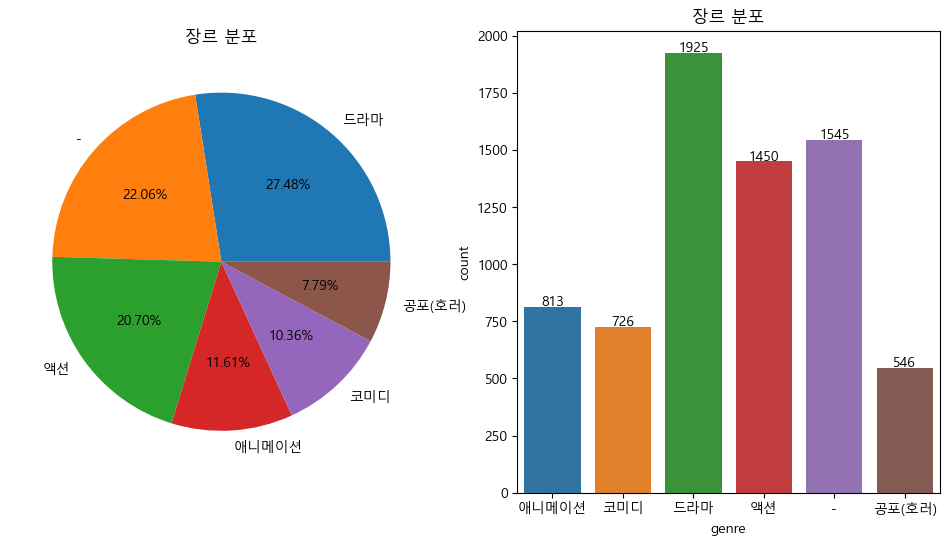

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

f,ax=plt.subplots(1,2,figsize=(12,6))

df['genre'].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[0])

ax[0].set_title('장르 분포')
ax[0].set_ylabel('')

sns.countplot(x='genre',data=df,ax=ax[1])

ax[1].set_title('장르 분포')

# 막대 위에 count 값을 표시
for p in ax[1].patches:
    height = p.get_height()
    ax[1].text(p.get_x() + p.get_width() / 2., height + 5, f'{int(height)}', ha="center")

plt.show()

In [4]:
df['genre'].value_counts()

genre
드라마       1925
-         1545
액션        1450
애니메이션      813
코미디        726
공포(호러)     546
Name: count, dtype: int64

In [5]:
# 장르 라벨링

from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

print(df['genre'].unique())

# 'genre' 열을 라벨링하여 새로운 'label_genre' 열 생성
df['genre'] = label_encoder.fit_transform(df['genre'])
print(df['genre'].unique())

df

['애니메이션' '코미디' '드라마' '액션' '-' '공포(호러)']
[3 5 2 4 0 1]


,idx,영화명,embedding1,embedding2,embedding3,vehicle,food,animal,bird,person,...,color_5_r,color_5_g,color_5_b,act_freq,ani_freq,com_freq,dra_freq,hor_freq,etc_freq,genre
0,4658,잃어버린 마법의 섬 홋타라케,애니메이션,애니메이션,애니메이션,0,0,0,0,1,...,0.6157,0.7529,0.8039,7,5,0,0,0,0,3
1,4660,극장판 메탈 베이블레이드 VS 태양 작열의 침략자 솔블레이즈,애니메이션,애니메이션,애니메이션,0,0,1,0,0,...,0.6784,0.2275,0.1725,0,4,0,0,0,0,3
2,4661,동자 대소동,드라마,액션,액션,0,0,0,0,4,...,0.7725,0.6627,0.5137,15,0,14,0,0,0,5
3,4662,심장이 뛴다,드라마,-,드라마,0,0,0,0,0,...,0.6471,0.4902,0.3373,1,0,0,1,0,0,2
4,4663,내 친구의 소원,-,드라마,공포(호러),0,0,0,0,3,...,0.8863,0.7333,0.6118,1,0,1,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7000,18416,붉은 사막,공포(호러),드라마,공포(호러),0,0,0,0,1,...,0.3804,0.1529,0.1255,4,1,1,2,0,0,2
7001,18417,비닐하우스,공포(호러),드라마,드라마,0,0,0,0,1,...,0.4392,0.3412,0.4431,3,0,1,0,0,3,0
7002,18418,에고이스트,드라마,드라마,코미디,0,0,0,0,2,...,0.3843,0.2941,0.2000,0,0,0,0,0,0,2
7003,18419,핑크퐁 시네마 콘서트3 : 진저브레드맨을 잡아라,애니메이션,애니메이션,애니메이션,0,1,1,0,0,...,0.8549,0.7176,0.2902,20,37,0,0,0,0,3


In [6]:
df['genre'].value_counts()

# 드라마    2
# -         0
# 액션      4
# 코미디    5
# 애니      3
# 공포      1

genre
2    1925
0    1545
4    1450
3     813
5     726
1     546
Name: count, dtype: int64

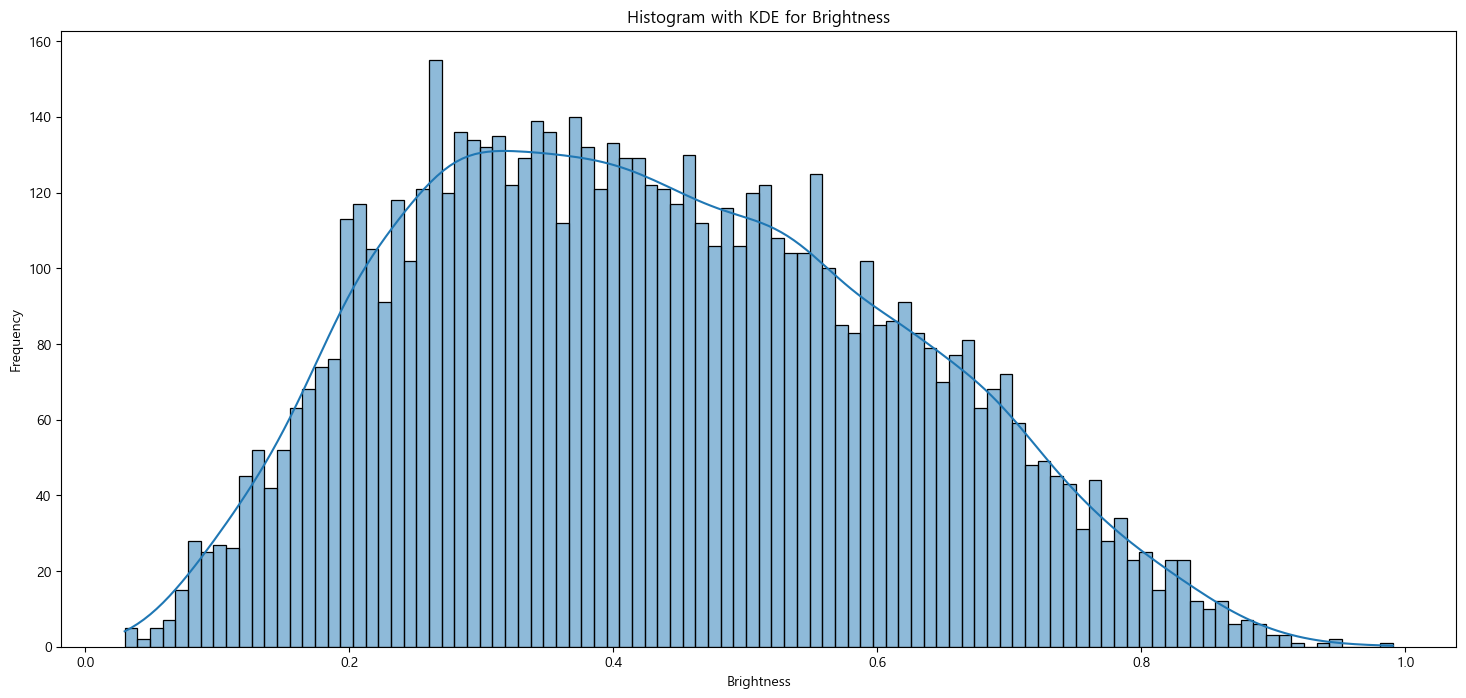

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 8))
sns.histplot(df['brightness'], bins=100, kde=True)
plt.title('Histogram with KDE for Brightness')
plt.xlabel('Brightness')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

### 임베딩 컬럼 원핫인코딩

In [8]:
# embedding1, embedding2, embedding3 열을 원핫인코딩
df_one_hot = pd.get_dummies(df, columns=['embedding1', 'embedding2', 'embedding3']).replace({True: 1, False: 0})
df_one_hot.drop(columns=['genre'], inplace=True)

df_gen = df[['idx', 'genre']]

df_one_hot = df_one_hot.merge(df_gen, on='idx', how='left')

# 결과 출력
df_one_hot

,idx,영화명,vehicle,food,animal,bird,person,objects,electronic products,computer,...,embedding2_애니메이션,embedding2_액션,embedding2_코미디,embedding3_-,embedding3_공포(호러),embedding3_드라마,embedding3_애니메이션,embedding3_액션,embedding3_코미디,genre
0,4658,잃어버린 마법의 섬 홋타라케,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,3
1,4660,극장판 메탈 베이블레이드 VS 태양 작열의 침략자 솔블레이즈,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,3
2,4661,동자 대소동,0,0,0,0,4,0,1,0,...,0,1,0,0,0,0,0,1,0,5
3,4662,심장이 뛴다,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
4,4663,내 친구의 소원,0,0,0,0,3,0,0,0,...,0,0,0,0,1,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7000,18416,붉은 사막,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,2
7001,18417,비닐하우스,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7002,18418,에고이스트,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,1,2
7003,18419,핑크퐁 시네마 콘서트3 : 진저브레드맨을 잡아라,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,3


In [9]:
df_one_hot

,idx,영화명,vehicle,food,animal,bird,person,objects,electronic products,computer,...,embedding2_애니메이션,embedding2_액션,embedding2_코미디,embedding3_-,embedding3_공포(호러),embedding3_드라마,embedding3_애니메이션,embedding3_액션,embedding3_코미디,genre
0,4658,잃어버린 마법의 섬 홋타라케,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,3
1,4660,극장판 메탈 베이블레이드 VS 태양 작열의 침략자 솔블레이즈,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,3
2,4661,동자 대소동,0,0,0,0,4,0,1,0,...,0,1,0,0,0,0,0,1,0,5
3,4662,심장이 뛴다,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
4,4663,내 친구의 소원,0,0,0,0,3,0,0,0,...,0,0,0,0,1,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7000,18416,붉은 사막,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,2
7001,18417,비닐하우스,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7002,18418,에고이스트,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,1,2
7003,18419,핑크퐁 시네마 콘서트3 : 진저브레드맨을 잡아라,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,3


In [10]:
df_one_hot = df_one_hot.iloc[:, 2:]
df_one_hot

,vehicle,food,animal,bird,person,objects,electronic products,computer,sport,weapon,...,embedding2_애니메이션,embedding2_액션,embedding2_코미디,embedding3_-,embedding3_공포(호러),embedding3_드라마,embedding3_애니메이션,embedding3_액션,embedding3_코미디,genre
0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,3
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,3
2,0,0,0,0,4,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,5
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
4,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7000,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2
7001,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7002,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
7003,0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,3


c:\Python3.9.13\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\tjoeun\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


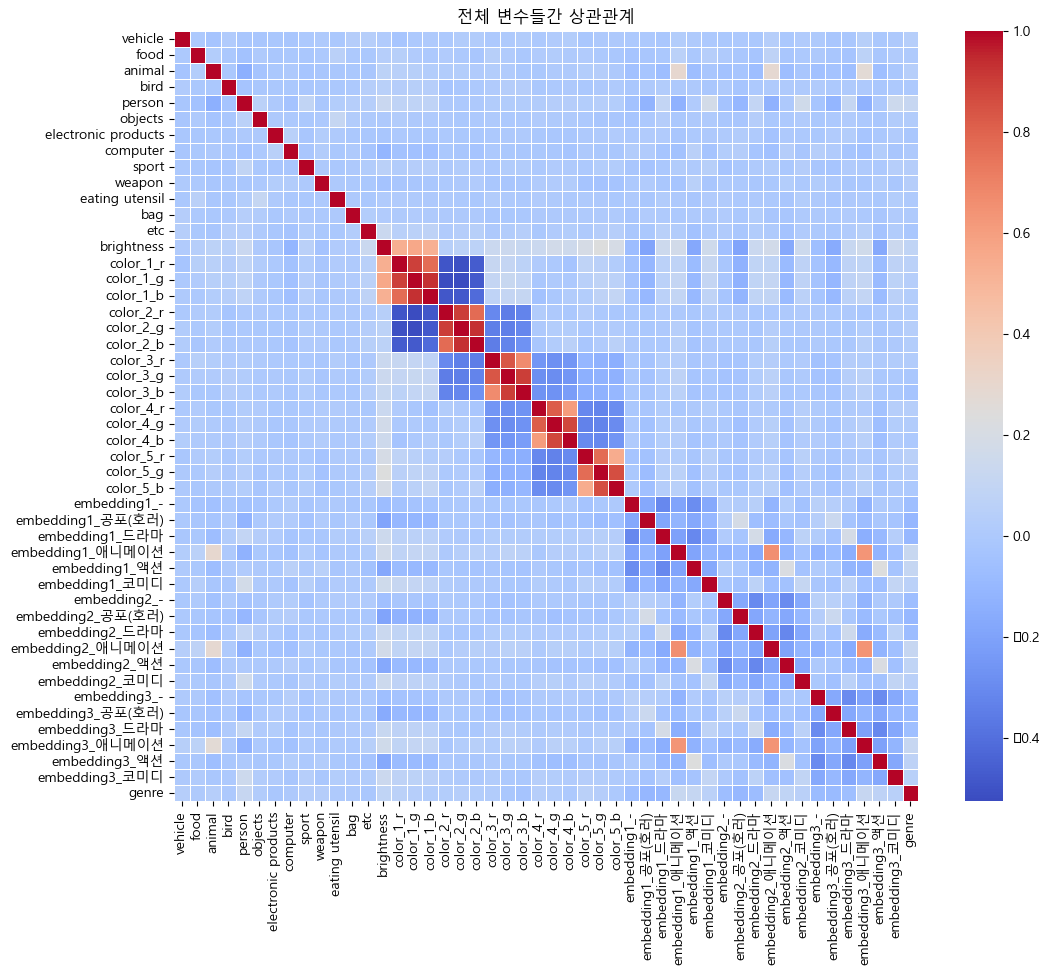

In [11]:
plt.figure(figsize=(12, 10))
corr_df = df_one_hot.copy()
sns.heatmap(corr_df.corr(), annot=False, cmap='coolwarm', linewidths=0.5, linecolor='white')
plt.title('전체 변수들간 상관관계')
# plt.xticks(rotation=45)
plt.show()

c:\Python3.9.13\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
c:\Python3.9.13\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
c:\Python3.9.13\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
c:\Python3.9.13\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
c:\Python3.9.13\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
c:\Python3.9.13\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\tjoeun\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing

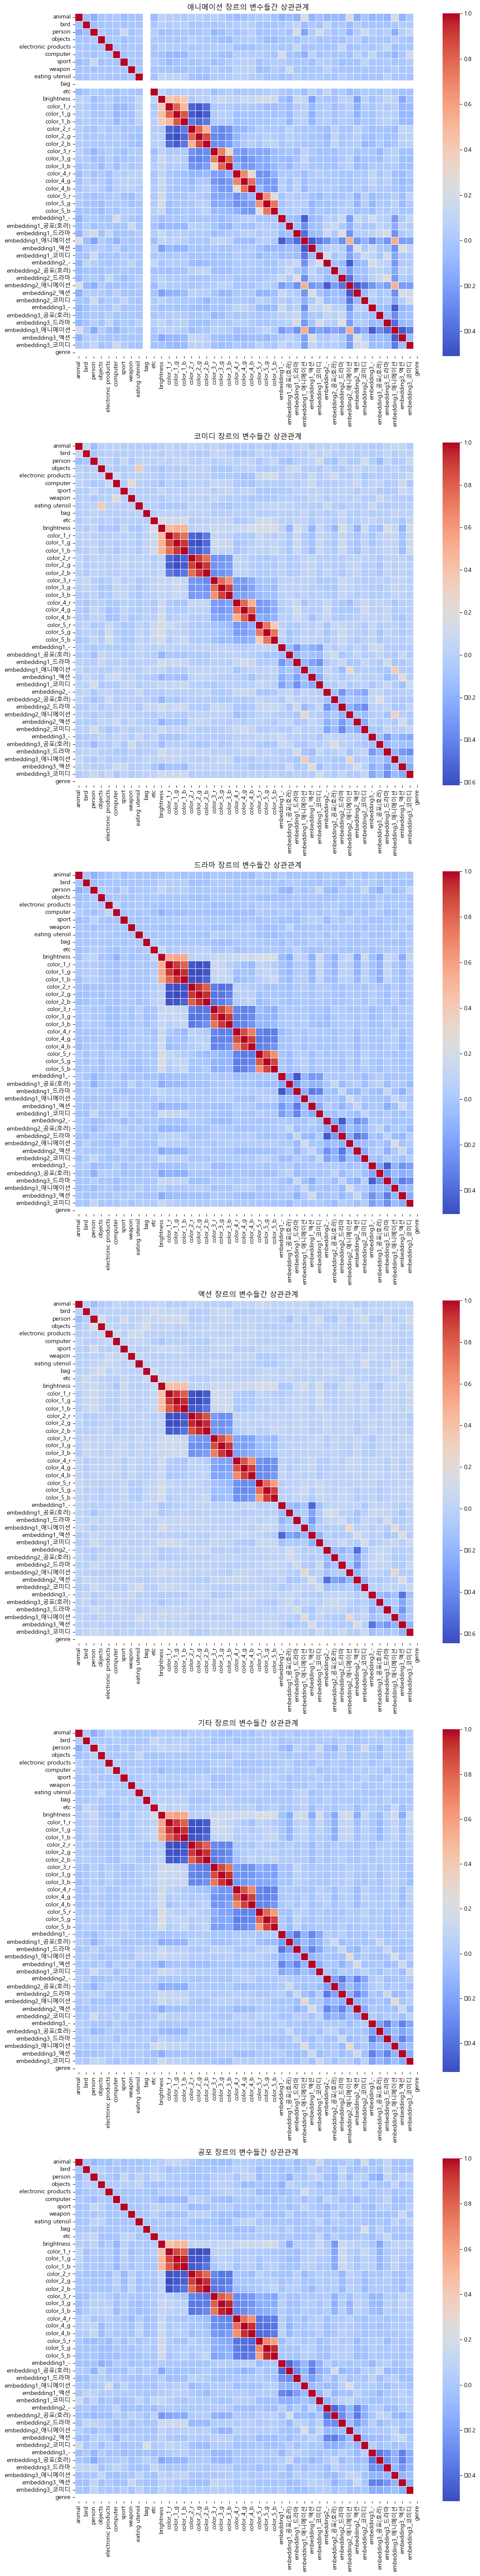

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 유니크한 genre 값을 가져오기
unique_genres = df_one_hot['genre'].unique()
genre_list = ['기타', '공포', '드라마', '애니메이션', '액션', '코미디']

# 유니크한 genre 값에 대한 subplot 생성
fig, axes = plt.subplots(nrows=len(unique_genres), ncols=1, figsize=(12, 10*len(unique_genres)))

# 각 genre 별로 상관관계 히트맵 그리기
for i, genre in enumerate(unique_genres):
    corr_df_gen = corr_df[corr_df['genre'] == genre]
    sns.heatmap(corr_df_gen.iloc[:, 2:].corr(), annot=False, cmap='coolwarm', linewidths=0.5, linecolor='white', ax=axes[i])
    axes[i].set_title(f'{genre_list[genre]} 장르의 변수들간 상관관계')
    
plt.tight_layout()
plt.show()

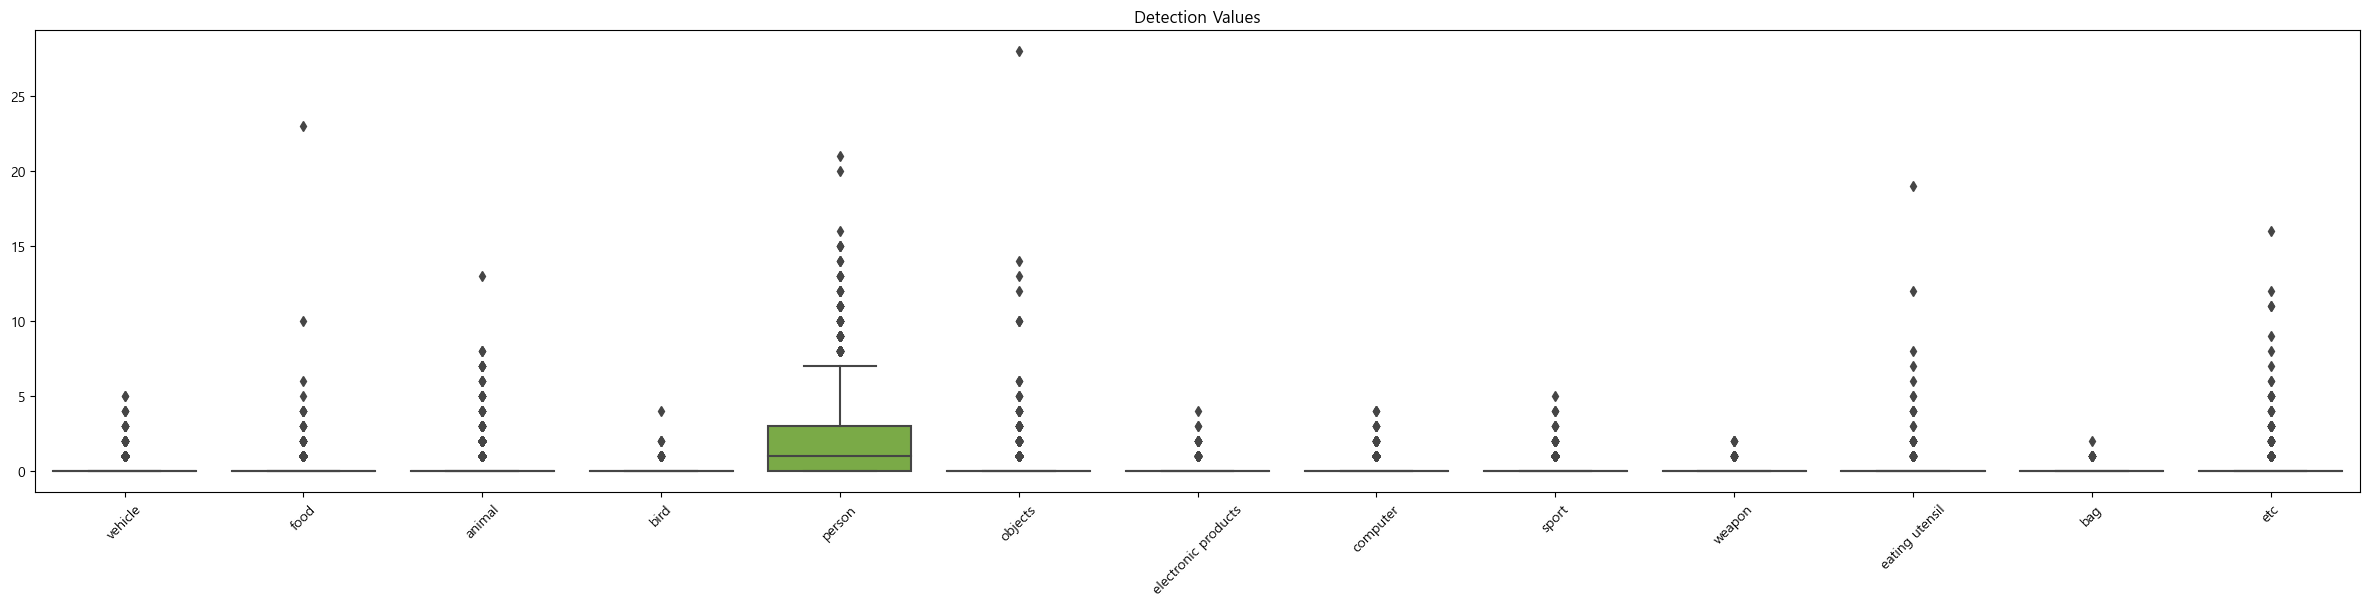

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 박스 플롯 그리기
plt.figure(figsize=(30, 6))  # 그림 크기 설정
sns.boxplot(data=df.iloc[:, 1:18], orient='v')  # 모든 열을 선택하여 박스 플롯 그리기 (orient='v'로 y와 x 축 바꾸기)
plt.xticks(rotation=45)

plt.title('Detection Values')

# 그래프 표시
plt.show()


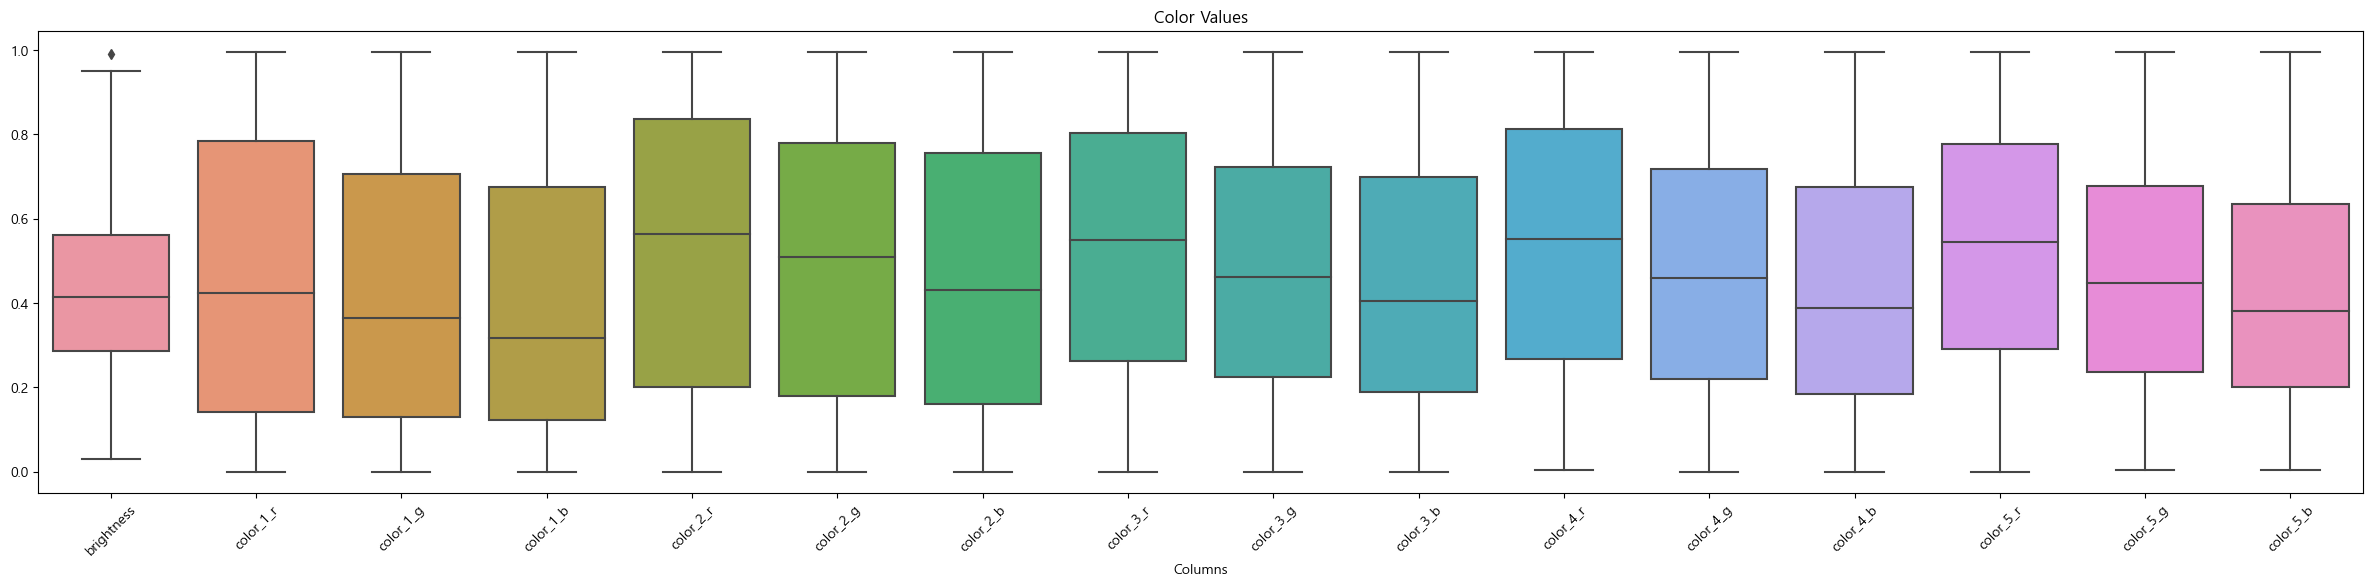

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 'brightness'부터 'color_3_b' 열까지 선택
selected_columns = df.loc[:, 'brightness':'color_5_b']

# 박스 플롯 그리기
plt.figure(figsize=(30, 6))  # 그림 크기 설정
sns.boxplot(data=selected_columns, orient='v')  # 선택한 열들로 박스 플롯 그리기 (orient='v'로 y와 x 축 바꾸기)

plt.xticks(rotation=45)

# 그래프 제목과 라벨 설정
plt.title('Color Values')
plt.xlabel('Columns')  # x 축 라벨 설정

# 그래프 표시
plt.show()

In [15]:
df

,idx,영화명,embedding1,embedding2,embedding3,vehicle,food,animal,bird,person,...,color_3_r,color_3_g,color_3_b,color_4_r,color_4_g,color_4_b,color_5_r,color_5_g,color_5_b,genre
0,4658,잃어버린 마법의 섬 홋타라케,애니메이션,애니메이션,애니메이션,0,0,0,0,1,...,0.1765,0.5686,0.6784,0.6157,0.5059,0.3529,0.6157,0.7529,0.8039,3
1,4660,극장판 메탈 베이블레이드 VS 태양 작열의 침략자 솔블레이즈,애니메이션,애니메이션,애니메이션,0,0,1,0,0,...,0.8510,0.8353,0.8157,0.4431,0.4627,0.5725,0.6784,0.2275,0.1725,3
2,4661,동자 대소동,드라마,액션,액션,0,0,0,0,4,...,0.7529,0.4078,0.2706,0.1843,0.1451,0.1020,0.7725,0.6627,0.5137,5
3,4662,심장이 뛴다,드라마,-,드라마,0,0,0,0,0,...,0.0549,0.0235,0.0235,0.9725,0.9608,0.8980,0.6471,0.4902,0.3373,2
4,4663,내 친구의 소원,-,드라마,공포(호러),0,0,0,0,3,...,0.8314,0.2275,0.2118,0.2549,0.1451,0.1333,0.8863,0.7333,0.6118,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7000,18416,붉은 사막,공포(호러),드라마,공포(호러),0,0,0,0,1,...,0.7020,0.1529,0.1255,0.9059,0.6627,0.5059,0.3804,0.1529,0.1255,2
7001,18417,비닐하우스,공포(호러),드라마,드라마,0,0,0,0,1,...,0.0706,0.0588,0.0941,0.4471,0.5373,0.7804,0.4392,0.3412,0.4431,0
7002,18418,에고이스트,드라마,드라마,코미디,0,0,0,0,2,...,0.0392,0.2000,0.3176,0.8392,0.7333,0.6745,0.3843,0.2941,0.2000,2
7003,18419,핑크퐁 시네마 콘서트3 : 진저브레드맨을 잡아라,애니메이션,애니메이션,애니메이션,0,1,1,0,0,...,0.2980,0.1412,0.1137,0.3373,0.8196,0.9569,0.8549,0.7176,0.2902,3


### 언더샘플링

In [16]:
RANDOM_STATE = 2023

In [17]:
df_one_hot

,vehicle,food,animal,bird,person,objects,electronic products,computer,sport,weapon,...,embedding2_애니메이션,embedding2_액션,embedding2_코미디,embedding3_-,embedding3_공포(호러),embedding3_드라마,embedding3_애니메이션,embedding3_액션,embedding3_코미디,genre
0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,3
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,3
2,0,0,0,0,4,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,5
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
4,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7000,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2
7001,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7002,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
7003,0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,3


In [18]:
df_one_hot_copy = df_one_hot.copy()
df_one_hot_copy = df_one_hot_copy.iloc[:, :-1]
df_one_hot_copy

,vehicle,food,animal,bird,person,objects,electronic products,computer,sport,weapon,...,embedding2_드라마,embedding2_애니메이션,embedding2_액션,embedding2_코미디,embedding3_-,embedding3_공포(호러),embedding3_드라마,embedding3_애니메이션,embedding3_액션,embedding3_코미디
0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,4,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,3,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7000,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
7001,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
7002,0,0,0,0,2,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
7003,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [19]:
df_one_hot['genre']

0       3
1       3
2       5
3       2
4       5
       ..
7000    2
7001    0
7002    2
7003    3
7004    1
Name: genre, Length: 7005, dtype: int32

In [20]:
df_one_hot_copy

,vehicle,food,animal,bird,person,objects,electronic products,computer,sport,weapon,...,embedding2_드라마,embedding2_애니메이션,embedding2_액션,embedding2_코미디,embedding3_-,embedding3_공포(호러),embedding3_드라마,embedding3_애니메이션,embedding3_액션,embedding3_코미디
0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,4,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,3,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7000,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
7001,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
7002,0,0,0,0,2,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
7003,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [21]:
train_cols = df_one_hot_copy.columns

X = df_one_hot_copy
y = df_one_hot['genre']

from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=RANDOM_STATE).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['genre'])

data_samp=pd.concat([X_samp,y_samp],axis=1)

data_samp["genre"].value_counts()

genre
0    546
1    546
2    546
3    546
4    546
5    546
Name: count, dtype: int64

In [22]:
data_samp

,vehicle,food,animal,bird,person,objects,electronic products,computer,sport,weapon,...,embedding2_애니메이션,embedding2_액션,embedding2_코미디,embedding3_-,embedding3_공포(호러),embedding3_드라마,embedding3_애니메이션,embedding3_액션,embedding3_코미디,genre
2659,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3888,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2820,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2768,0,0,1,0,0,0,2,0,0,0,...,0,0,1,1,0,0,0,0,0,0
3805,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2562,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,5
4044,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,5
4457,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,5
998,0,1,0,0,2,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,5


In [23]:
X = data_samp.iloc[:, :-1].values
y = data_samp.iloc[:, -1].values

In [24]:
X

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [25]:
y

array([0, 0, 0, ..., 5, 5, 5])

### train 데이터와 test 데이터 나누기(8:2)

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=RANDOM_STATE)

In [27]:
print(type(X_train))
print(X_train.shape)

<class 'numpy.ndarray'>
(2620, 47)


In [28]:
import numpy as np
np.unique(y_train)

print(type(y_train))
print(y_train.shape)

<class 'numpy.ndarray'>
(2620,)


In [29]:
print('====y_train====\n',pd.Series(y_train).value_counts())
print('====y_test====\n',pd.Series(y_test).value_counts())

====y_train====
 3    437
0    437
4    437
2    437
1    436
5    436
Name: count, dtype: int64
====y_test====
 5    110
1    110
3    109
2    109
0    109
4    109
Name: count, dtype: int64


### 하이퍼파라미터

In [30]:
dropout_prob = 0.6
EPOCH = 500

In [32]:
import tensorflow as tf
from tensorflow.keras import preprocessing
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, Dropout, Conv1D, GlobalMaxPool1D, concatenate

train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(20)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(20)

In [33]:
train_ds

<_BatchDataset element_spec=(TensorSpec(shape=(None, 47), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [34]:
X_train.shape

(2620, 47)

In [35]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [36]:
X_train.shape

(2620, 47, 1)

In [37]:
from tensorflow.keras.layers import BatchNormalization

# 모델 정의
input_layer = Input(shape=(47, 1))
dropout_emb = Dropout(rate=dropout_prob)(input_layer)

conv1 = Conv1D(
    filters=128,
    kernel_size=3,
    padding='same',
    activation=tf.nn.relu)(dropout_emb)
conv1_bn = BatchNormalization()(conv1)
pool1 = GlobalMaxPool1D()(conv1_bn)

conv2 = Conv1D(
    filters=128,
    kernel_size=4,
    padding='same',
    activation=tf.nn.relu)(dropout_emb)
conv2_bn = BatchNormalization()(conv2)
pool2 = GlobalMaxPool1D()(conv2_bn)

conv3 = Conv1D(
    filters=128,
    kernel_size=5,
    padding='same',
    activation=tf.nn.relu)(dropout_emb)
conv3_bn = BatchNormalization()(conv3)
pool3 = GlobalMaxPool1D()(conv3_bn)

# 3, 4, 5gram 이후 합치기
concat = concatenate([pool1, pool2, pool3])

hidden1 = Dense(128, activation=tf.nn.relu)(concat)
hidden1_bn = BatchNormalization()(hidden1)
hidden2 = Dense(128, activation=tf.nn.relu)(hidden1_bn)
hidden2_bn = BatchNormalization()(hidden2)
hidden3 = Dense(128, activation=tf.nn.relu)(hidden2_bn)

dropout_hidden = Dropout(rate=dropout_prob)(hidden3)
logits = Dense(6, name='logits')(dropout_hidden)
predictions = Dense(6, activation=tf.nn.softmax)(logits)

# 모델 생성
model = Model(inputs=input_layer, outputs=predictions)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 47, 1)]              0         []                            
                                                                                                  
 dropout (Dropout)           (None, 47, 1)                0         ['input_1[0][0]']             
                                                                                                  
 conv1d (Conv1D)             (None, 47, 128)              512       ['dropout[0][0]']             
                                                                                                  
 conv1d_1 (Conv1D)           (None, 47, 128)              640       ['dropout[0][0]']             
                                                                                              

In [38]:
train_ds

<_BatchDataset element_spec=(TensorSpec(shape=(None, 47), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

# EarlyStopping 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

# 모델 학습
hist = model.fit(train_ds, validation_data=test_ds, epochs=EPOCH, verbose=1, callbacks=[early_stopping])

Epoch 1/500
131/131 [==============================] - 4s 9ms/step - loss: 2.0478 - accuracy: 0.1836 - val_loss: 1.8288 - val_accuracy: 0.1601
Epoch 2/500
131/131 [==============================] - 1s 7ms/step - loss: 1.8704 - accuracy: 0.1832 - val_loss: 1.8382 - val_accuracy: 0.1707
Epoch 3/500
131/131 [==============================] - 1s 7ms/step - loss: 1.8287 - accuracy: 0.1828 - val_loss: 2.0901 - val_accuracy: 0.1692
Epoch 4/500
131/131 [==============================] - 1s 10ms/step - loss: 1.8158 - accuracy: 0.1989 - val_loss: 1.9397 - val_accuracy: 0.1799
Epoch 5/500
131/131 [==============================] - 1s 7ms/step - loss: 1.7968 - accuracy: 0.1885 - val_loss: 1.8138 - val_accuracy: 0.1555
Epoch 6/500
131/131 [==============================] - 1s 7ms/step - loss: 1.7977 - accuracy: 0.2023 - val_loss: 1.8693 - val_accuracy: 0.2043
Epoch 7/500
131/131 [==============================] - 1s 7ms/step - loss: 1.7946 - accuracy: 0.2065 - val_loss: 1.7871 - val_accuracy: 0.219

In [40]:
model.save(f'c:/3rd_project/model/CNN_231008_a.h5')

c:\Python3.9.13\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [41]:
import tensorflow as tf

model = tf.keras.models.load_model('c:/3rd_project/model/CNN_231008_a.h5')
# 모델 평가
score = model.evaluate(X_test, y_test, verbose=1)
print(f"EPOCH : {EPOCH}")
print(f"Accuracy: {round(score[1],4)}")
print(f"Loss: {round(score[0],4)}")

21/21 [==============================] - 0s 2ms/step - loss: 1.7543 - accuracy: 0.2271
EPOCH : 500
Accuracy: 0.2271
Loss: 1.7543


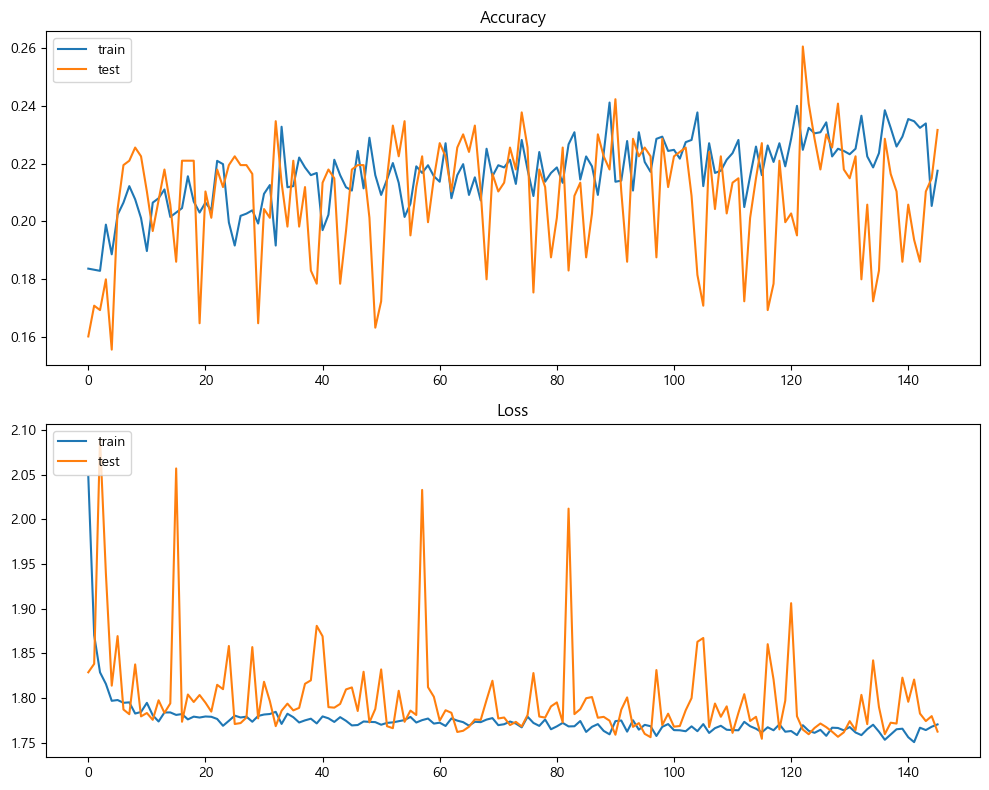

In [42]:
import matplotlib.pyplot as plt

# 그래프 크기 조정
plt.figure(figsize=(10, 8))

# Accuracy 그래프
plt.subplot(2, 1, 1)  # 2행 1열의 첫 번째 subplot
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')

# Loss 그래프
plt.subplot(2, 1, 2)  # 2행 1열의 두 번째 subplot
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')

# 그래프 간격 조정
plt.tight_layout()

# 그래프 표시
plt.show()

In [ ]:
# 드라마    2
# -         0
# 액션      4
# 코미디    5
# 공포      1

In [48]:
df_one_hot

,vehicle,food,animal,bird,person,objects,electronic products,computer,sport,weapon,...,embedding2_애니메이션,embedding2_액션,embedding2_코미디,embedding3_-,embedding3_공포(호러),embedding3_드라마,embedding3_애니메이션,embedding3_액션,embedding3_코미디,genre
0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,3
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,3
2,0,0,0,0,4,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,5
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
4,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7000,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2
7001,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7002,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
7003,0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,3


In [49]:
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import preprocessing

model = load_model('c:/3rd_project/model/CNN_231008_a.h5')
labels = {0: 'etc',
          1: 'horror',
          2: 'drama',
          3: 'ani',
          4: 'action',
          5: 'comedy'
          }

# test_data_0 = df.iloc[453][1:-1].values
# print('test_full_data\n',df.iloc[453].values)

# test_data_1 = df.iloc[1853][1:-1].values
# print('test_full_data\n',df.iloc[1853].values)

# test_data_2 = df.iloc[2210][1:-1].values
# print('test_full_data\n',df.iloc[2210].values)

# test_data_3 = df.iloc[3063][1:-1].values
# print('test_full_data\n',df.iloc[3063].values)

# test_data_4 = df.iloc[5113][1:-1].values
# print('test_full_data\n',df.iloc[5113].values)

num = [885, 3925, 1732, 409, 486, 551]

for i in num:
    print('test_full_data\n', df.iloc[i].values)

    test_data = df_one_hot.iloc[i][:-1].values.reshape(1, -1, 1).astype('float32')

    predictions = model.predict(test_data)

    print(f"                   etc      horror      drama       ani     action       comedy")
    print(f"장르별 확률 : {predictions[0]}")


    # 상위 3개 클래스의 인덱스 가져오기
    top3_indices = np.argsort(predictions[0])[::-1][:3]

    # 상위 3개 클래스 출력
    top3_classes = [labels[i] for i in top3_indices]
    print("상위 3개 클래스:", top3_classes)


    # 예측 결과를 클래스 레이블로 변환합니다.
    predicted_label = labels[np.argmax(predictions[0])]

    # 정답 라벨을 텍스트로 변환합니다.
    actual_label = labels[df.iloc[i]['genre']]

    # 정답 결과와 예측 결과를 출력합니다.
    print(f"정답 : {actual_label}")
    print(f"예측 : {predicted_label}\n")

test_full_data
 [5913 '전국노래자랑' '코미디' '-' '코미디' 0 0 0 0 8 0 0 0 0 0 0 0 0 0.6371 0.9059
 0.8863 0.8627 0.7137 0.2863 0.1843 0.1804 0.1608 0.1686 0.9176 0.7804
 0.5569 0.7647 0.5608 0.4039 5]
1/1 [==============================] - 0s 369ms/step
                   etc      horror      drama       ani     action       comedy
장르별 확률 : [0.1593091  0.07470434 0.19459441 0.16287225 0.13831055 0.27020934]
상위 3개 클래스: ['comedy', 'drama', 'ani']
정답 : comedy
예측 : comedy

test_full_data
 [11644 '엑소시스트: 사탄의 부활' '공포(호러)' '공포(호러)' '공포(호러)' 0 0 0 0 1 0 0 0 0 0 0 0
 0 0.2065 0.1686 0.1843 0.2314 0.8706 0.8941 0.9176 0.0667 0.0706 0.0863
 0.3098 0.3255 0.3922 0.502 0.5412 0.6078 1]
1/1 [==============================] - 0s 20ms/step
                   etc      horror      drama       ani     action       comedy
장르별 확률 : [0.17734164 0.24051067 0.14815193 0.14778417 0.1715975  0.11461406]
상위 3개 클래스: ['horror', 'etc', 'action']
정답 : horror
예측 : horror

test_full_data
 [7090 '꼬마 니콜라의 여름방학' '코미디' '-' '드라마' 0 0

### 성능 개선

In [ ]:
b

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="scikeras.wrappers")

# 모델을 래핑하는 함수 정의
def create_model(dropout=0.2, learning_rate=0.001, filters=128, kernel_size=3):
    # 모델 정의
    input_layer = Input(shape=(91, 1))
    dropout_emb = Dropout(rate=dropout)(input_layer)

    conv1 = Conv1D(
        filters=128,
        kernel_size=3,
        padding='same',
        activation=tf.nn.relu)(dropout_emb)
    conv1_bn = BatchNormalization()(conv1)
    pool1 = GlobalMaxPool1D()(conv1_bn)

    conv2 = Conv1D(
        filters=128,
        kernel_size=4,
        padding='same',
        activation=tf.nn.relu)(dropout_emb)
    conv2_bn = BatchNormalization()(conv2)
    pool2 = GlobalMaxPool1D()(conv2_bn)

    conv3 = Conv1D(
        filters=128,
        kernel_size=5,
        padding='same',
        activation=tf.nn.relu)(dropout_emb)
    conv3_bn = BatchNormalization()(conv3)
    pool3 = GlobalMaxPool1D()(conv3_bn)

    # 3, 4, 5gram 이후 합치기
    concat = concatenate([pool1, pool2, pool3])

    hidden1 = Dense(128, activation=tf.nn.relu)(concat)
    hidden1_bn = BatchNormalization()(hidden1)
    hidden2 = Dense(128, activation=tf.nn.relu)(hidden1_bn)
    hidden2_bn = BatchNormalization()(hidden2)
    hidden3 = Dense(128, activation=tf.nn.relu)(hidden2_bn)

    dropout_hidden = Dropout(rate=dropout)(hidden3)
    logits = Dense(6, name='logits')(dropout_hidden)
    predictions = Dense(6, activation=tf.nn.softmax)(logits)

    # 모델 생성
    model = Model(inputs=input_layer, outputs=predictions)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
    
    return model  # 모델을 반환

# 하이퍼파라미터 탐색 범위 정의
param_dist = {
    'dropout': [0.2, 0.3, 0.4],
    'learning_rate': [0.001, 0.01, 0.1],
    'filters': [64, 128, 256],  # filters 파라미터를 추가
    'kernel_size': [3, 4, 5],
    'batch_size': [16, 32, 64]
}

# Keras 모델을 Scikit-learn 호환으로 변환
model = KerasClassifier(build_fn=create_model, epochs=5, verbose=1, dropout=0.2, learning_rate=0.001, filters=64, kernel_size=3, batch_size=16)

# 랜덤 서치 실행
random_search = GridSearchCV(
    model, param_grid=param_dist, scoring='accuracy', cv=3)

random_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터와 성능 출력
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation accuracy: ", random_search.best_score_)


In [ ]:
import tensorflow as tf

print("TensorFlow 버전:", tf.__version__)

import sklearn

print("scikit-learn 버전:", sklearn.__version__)